# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv("CHURN_CREDIT_MOD14_PART2.csv",delimiter=',')

df.head(20)


,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-To-Month,Electronic Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One Year,Mailed Check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-To-Month,Mailed Check,53.85,108.15,Yes
3,0895-LMRSF,Male,0,No,No,23,Nan,DSL,No,No,Yes,One Year,Bank Transfer (Automatic),64.90,1509.80,No
4,8098-LLAZX,Female,1,No,No,4,Nan,Fiber Optic,No,No,Yes,Month-To-Month,Electronic Check,95.45,396.10,Yes
5,8266-VBFQL,Male,0,No,No,4,Nan,Fiber Optic,No,Yes,No,Month-To-Month,Electronic Check,90.40,356.65,No
6,8181-YHCMF,Female,0,Yes,Yes,68,Nan,DSL,No,Yes,Yes,Two Year,Credit Card (Automatic),60.30,4109.00,No
7,2240-HSJQD,Male,0,No,Yes,38,Nan,Fiber Optic,No,No,No,Month-To-Month,Mailed Check,81.85,3141.70,No
8,1248-DYXUB,Male,0,Yes,Yes,52,Nan,No,No Internet Service,No Internet Service,No Internet Service,Two Year,Mailed Check,24.80,1229.10,No
9,0265-EDXBD,Male,1,Yes,No,32,Nan,Fiber Optic,No,No,No,Month-To-Month,Electronic Check,74.90,2303.35,Yes


In [4]:
escricao = df.describe(include="all")
print(df.columns)

Index(['customerID', 'Genero', 'Idoso', 'Casado', 'Dependents',
       'Tempo_como_Cliente', 'PhoneService', 'Servico_Internet',
       'Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV', 'Tipo_Contrato',
       'PaymentMethod', 'Pagamento_Mensal', 'Total_Pago', 'Churn'],
      dtype='object')


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

        customerID Genero        Idoso Casado Dependents  Tempo_como_Cliente  \
count         2175   2175  2175.000000   2175       2175         2175.000000   
unique        2175      2          NaN      2          2                 NaN   
top     6061-GWWAV   Male          NaN     No         No                 NaN   
freq             1   1120          NaN   1098       1487                 NaN   
mean           NaN    NaN     0.160920    NaN        NaN           32.441379   
std            NaN    NaN     0.367541    NaN        NaN           24.609875   
min            NaN    NaN     0.000000    NaN        NaN            0.000000   
25%            NaN    NaN     0.000000    NaN        NaN            8.500000   
50%            NaN    NaN     0.000000    NaN        NaN           29.000000   
75%            NaN    NaN     0.000000    NaN        NaN           56.000000   
max            NaN    NaN     1.000000    NaN        NaN           72.000000   

       PhoneService Servico_Internet Se

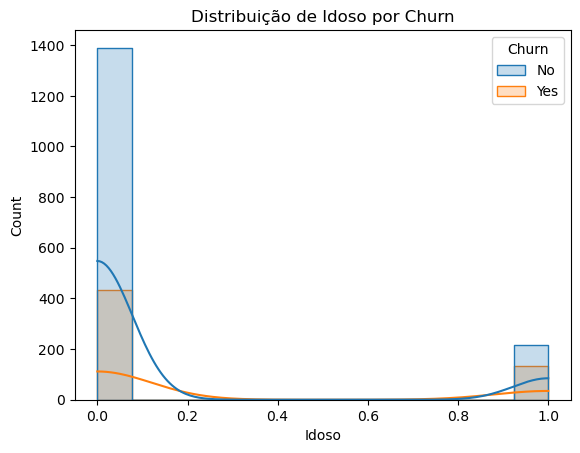

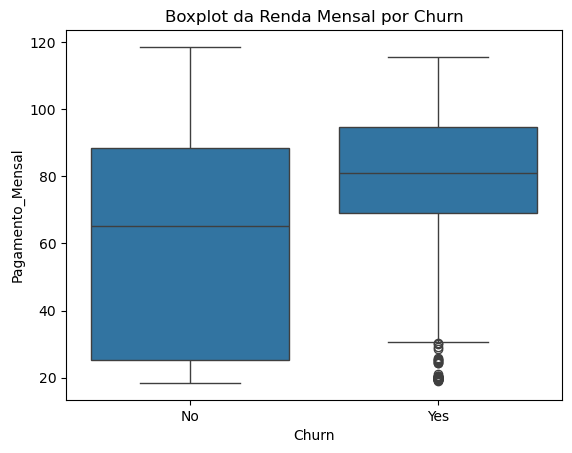

   Total_Servicos_Usados Churn
0                      0    No
1                      2    No
2                      2   Yes
3                      1    No
4                      1   Yes


C:\Users\Léo\AppData\Local\Temp\ipykernel_18712\2821309910.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ]].applymap(lambda x: 1 if x == 'Yes' else 0)


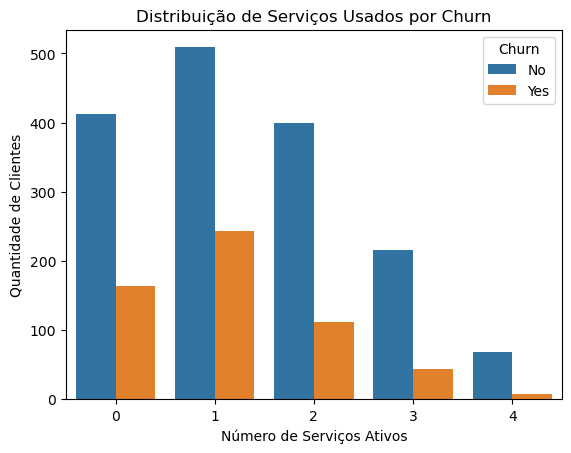

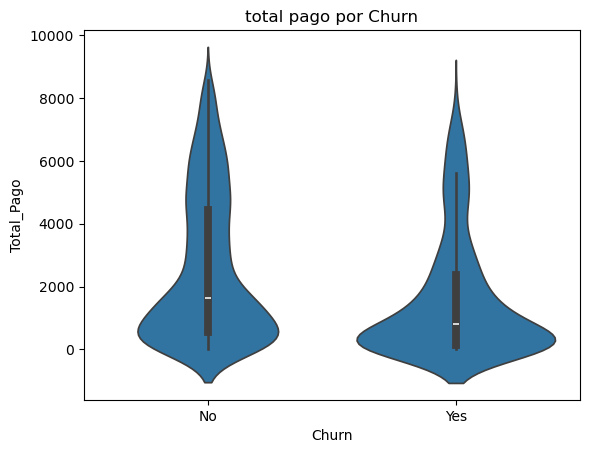

In [5]:
descricao = df.describe(include="all")
print(descricao)

variaveis_numericas = df.select_dtypes(include=["int64", "float64"]).columns

# Verificar outliers usando o método 
for coluna in variaveis_numericas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[coluna] < (Q1 - 1.5 * IQR)) | (df[coluna] > (Q3 + 1.5 * IQR))]
    if not outliers.empty:
        print(f"Possíveis outliers detectados na variável: {coluna} (Total: {len(outliers)})")

# Gráfico 1: Distribuição da idade por churn
sns.histplot(data=df, x='Idoso', hue='Churn', kde=True, element='step')
plt.title("Distribuição de Idoso por Churn")
plt.show()

# Gráfico 2: Boxplot da renda mensal
sns.boxplot(data=df, x='Churn', y='Pagamento_Mensal')
plt.title("Boxplot da Renda Mensal por Churn")
plt.show()

# Gráfico 3: Frequência de produtos
servicos_binarios = df[[
    'PhoneService',
    'Servico_Internet',
    'Servico_Seguranca',
    'Suporte_Tecnico',
    'StreamingTV'
]].applymap(lambda x: 1 if x == 'Yes' else 0)

# Somar os serviços usados para cada cliente
df['Total_Servicos_Usados'] = servicos_binarios.sum(axis=1)

print(df[['Total_Servicos_Usados', 'Churn']].head())

sns.countplot(data=df, x='Total_Servicos_Usados', hue='Churn')
plt.title("Distribuição de Serviços Usados por Churn")
plt.xlabel("Número de Serviços Ativos")
plt.ylabel("Quantidade de Clientes")
plt.show()

# Gráfico 4: Score de crédito por churn
sns.violinplot(data=df, x='Churn', y='Total_Pago')
plt.title("total pago por Churn")
plt.show()




# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


    Optei por manter,os dados aparentão estar nos conformes,nenhuma variavel númerica apresenta outliers.
    A maioria dos clientes não são idosos,ou seja eles tendem a cancelar menos.
    Os clientes Churns geralmente pagaram menos ao longo do tempo, mediana e o limite superior dos que ficaram são significativamente maiores

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

    1-Churn por Gênero
    Não há diferença significativa entre homens e mulheres quanto à taxa de cancelamento.
    Gênero não parece ser um fator decisivo.

    2- Churn por Idoso
    Clientes idosos têm menor propensão ao churn.
    Clientes mais velhos talvez sejam mais leais ou tenham mais dificuldade de mudar de provedor.

    3- Churn por Tipo de Contrato
    Contratos mensais têm maior taxa de churn.
    Contratos de 1 ou 2 anos retêm mais clientes, o que é esperado por envolver maior compromisso.

    4-Churn por uso de StreamingTV
    Clientes que usam StreamingTV tendem a sair mais do que os que não utilizam.
    Pode indicar que serviços adicionais nem sempre fidelizam, ou que usuários mais digitais são mais exigentes.

    5-Pagamento Mensal x Churn
    Clientes que pagam mais por mês tendem a cancelar mais.
    Valores altos podem gerar insatisfação ou percepção de custo elevado.

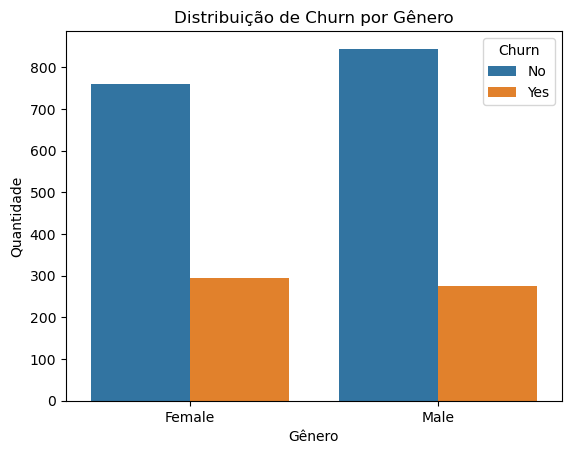

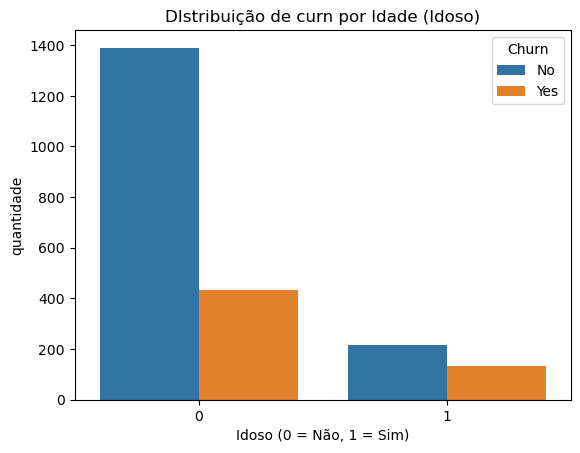

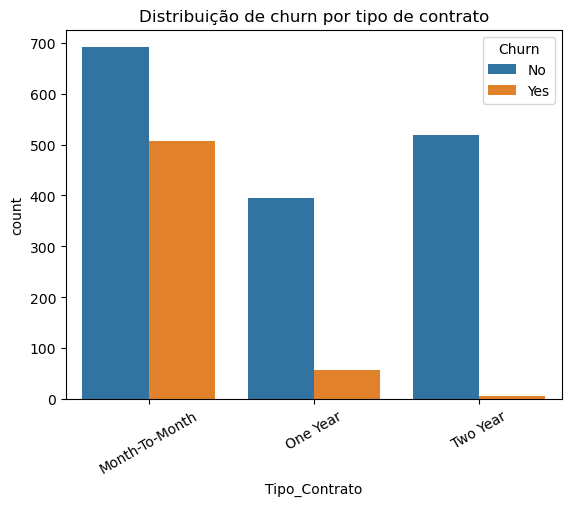

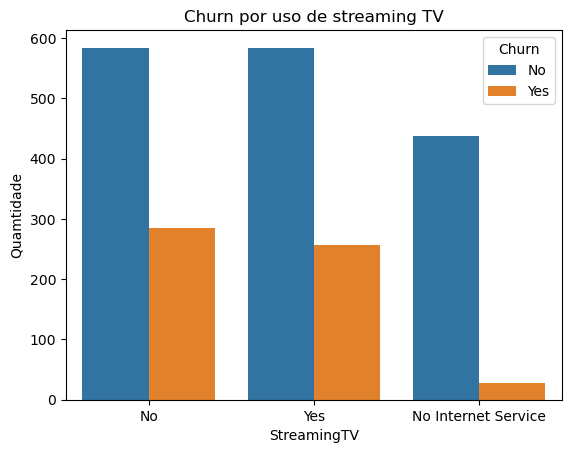

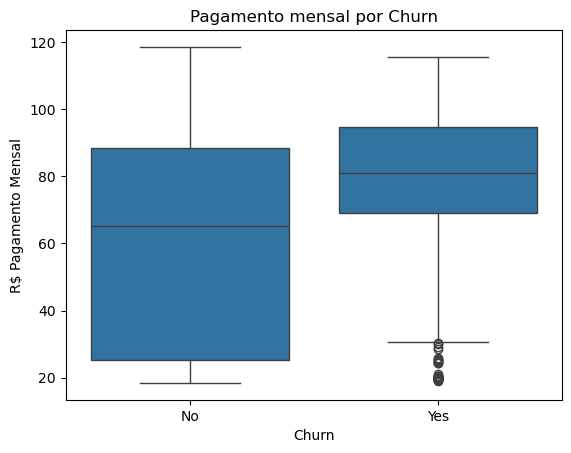

In [40]:
#churn por gênero
sns.countplot(data=df, x='Genero', hue='Churn')
plt.title("Distribuição de Churn por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.show()

#churn por idoso
sns.countplot(data=df, x='Idoso',hue='Churn')
plt.title("DIstribuição de curn por Idade (Idoso)")
plt.xlabel("Idoso (0 = Não, 1 = Sim)")
plt.ylabel("quantidade")
plt.show()

#Churn por tipo de contato
sns.countplot(data=df, x='Tipo_Contrato', hue='Churn')
plt.title("Distribuição de churn por tipo de contrato")
plt.xticks(rotation=30)
plt.show()

#Churn por uso de streamingTV
sns.countplot(data=df, x='StreamingTV', hue='Churn')
plt.title("Churn por uso de streaming TV")
plt.xlabel("StreamingTV")
plt.ylabel("Quamtidade")
plt.show()

#Pagamento Mensal x Churn
sns.boxplot(data=df, x='Churn', y='Pagamento_Mensal')
plt.title('Pagamento mensal por Churn')
plt.ylabel("R$ Pagamento Mensal")
plt.show()

# Variáveis mais importantes relacionadas ao Churn

tipo_Contrato – Clientes com contratos mensais cancelam muito mais.

Pagamento_Mensal – Quanto maior o valor, maior a chance de churn.

Idoso – Idosos demonstram menor propensão ao churn.

StreamingTV – Pode influenciar na decisão de saída.

Tempo_como_Cliente – Clientes mais antigos têm menor churn.